# CARGA DEL CONJUNTO DE DATOS

In [175]:
import pandas as pd

# Cargar el dataset a analizar
clima_full = pd.read_csv("/content/preprocessed_clima_full.csv")

# Mostrar el dataset
clima_full.head()

,Unnamed: 0,NAME,STATION,DATE,year,month,day,TMIN,TMAX,TAVG,PRCP,SNWD
0,0,"MENDOZA AERO, AR",AR000087418,1957-06-30,1957,6,30,-4.2,9.8,2.8,0.0,0.0
1,1,"MENDOZA AERO, AR",AR000087418,1957-07-01,1957,7,1,-3.5,10.5,3.5,0.0,0.0
2,2,"MENDOZA AERO, AR",AR000087418,1957-07-02,1957,7,2,-2.3,11.7,4.7,0.0,0.0
3,3,"MENDOZA AERO, AR",AR000087418,1957-07-03,1957,7,3,-0.9,13.1,6.1,0.0,0.0
4,4,"MENDOZA AERO, AR",AR000087418,1957-07-04,1957,7,4,0.3,14.3,7.3,0.0,0.0


# DESCRIPCION DE LOS DATOS

In [176]:
clima_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24122 entries, 0 to 24121
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24122 non-null  int64  
 1   NAME        24122 non-null  object 
 2   STATION     24122 non-null  object 
 3   DATE        24122 non-null  object 
 4   year        24122 non-null  int64  
 5   month       24122 non-null  int64  
 6   day         24122 non-null  int64  
 7   TMIN        24122 non-null  float64
 8   TMAX        24122 non-null  float64
 9   TAVG        24122 non-null  float64
 10  PRCP        24122 non-null  float64
 11  SNWD        24122 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 2.2+ MB


In [177]:
# ELiminar la columna "Unnamed: 0"
clima_full.drop(columns=["Unnamed: 0", "NAME", "STATION", "year", "month", "day"], inplace=True)

# Cambiar los nombres de las columnas
clima_full.rename(columns={'DATE':'date', 'TMIN':'tmin', 'TMAX':'tmax', 'TAVG':'tavg', 'PRCP':'precipitation', 'SNWD':'snowfall'}, inplace=True)

# Transformar datos de la columna 'date' en tipo datetime
clima_full['date'] = pd.to_datetime(clima_full['date'])

# Desglozamos la columna date para tener una mejor perspectiva predictiva
clima_full['year'] = clima_full['date'].dt.year
clima_full['month'] = clima_full['date'].dt.month
clima_full['day'] = clima_full['date'].dt.day

# Función para determinar la estación del año en Argentina
def get_season(date):
    if date >= pd.Timestamp(year=date.year, month=12, day=21) or date <= pd.Timestamp(year=date.year, month=3, day=20):
        return 'summer'
    elif date >= pd.Timestamp(year=date.year, month=3, day=21) and date <= pd.Timestamp(year=date.year, month=6, day=20):
        return 'autumn'
    elif date >= pd.Timestamp(year=date.year, month=6, day=21) and date <= pd.Timestamp(year=date.year, month=9, day=20):
        return 'winter'
    elif date >= pd.Timestamp(year=date.year, month=9, day=21) and date <= pd.Timestamp(year=date.year, month=12, day=20):
        return 'spring'

# aplicar la función a la columna 'season'
clima_full['season'] = clima_full['date'].apply(get_season)

# Function to determine the phenology cycle based on the month in Argentina
def get_phenology_cycle(date):
    month = date.month
    if month in [6, 7, 8]:
        return 'Reposo invernal'
    elif month == 9:
        return 'Brotacion'
    elif month in [10, 11]:
        return 'Floracion'
    elif month in [11, 12]:
        return 'Cuajado'
    elif month in [1, 2]:
        return 'Envero'
    elif month in [2, 3, 4]:
        return 'Cosecha'
    else:
        return 'Fuera del ciclo tipico'  # Esto maneja cualquier caso no cubierto explícitamente

# Apply the function to the date column
clima_full['phenology_cycle'] = clima_full['date'].apply(get_phenology_cycle)

# Cambiamos la posición de las columnas
clima_full = clima_full[["date", "year", "month", "day", "season", "phenology_cycle", "tmin", "tmax", "tavg", "precipitation", "snowfall"]]

clima_full.head()

,date,year,month,day,season,phenology_cycle,tmin,tmax,tavg,precipitation,snowfall
0,1957-06-30,1957,6,30,winter,Reposo invernal,-4.2,9.8,2.8,0.0,0.0
1,1957-07-01,1957,7,1,winter,Reposo invernal,-3.5,10.5,3.5,0.0,0.0
2,1957-07-02,1957,7,2,winter,Reposo invernal,-2.3,11.7,4.7,0.0,0.0
3,1957-07-03,1957,7,3,winter,Reposo invernal,-0.9,13.1,6.1,0.0,0.0
4,1957-07-04,1957,7,4,winter,Reposo invernal,0.3,14.3,7.3,0.0,0.0


In [178]:
season_counts = clima_full['season'].groupby(clima_full['season']).size()
print(season_counts)
print(season_counts.sum())

season
autumn    6047
spring    6044
summer    5961
winter    6070
Name: season, dtype: int64
24122


In [179]:
clima_full.season.count()

24122

In [180]:
from google.colab import files

clima_full.to_csv("clima_vid_fix.csv", sep=';', decimal=',')
files.download("clima_vid_fix.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
clima_full.describe(include='all')

,date,year,month,day,season,phenology_cycle,tmin,tmax,tavg,precipitation,snowfall
count,24122,24122.000000,24122.000000,24122.000000,24122,24122,24122.000000,24122.000000,24122.000000,24122.000000,24122.000000
unique,NaN,NaN,NaN,NaN,4,7,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,winter,Reposo invernal,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,6070,6072,NaN,NaN,NaN,NaN,NaN
mean,1991-06-08 16:45:17.386618112,1990.934375,6.536647,15.728712,NaN,NaN,10.406882,24.505468,17.318261,0.460716,0.000713
min,1957-06-30 00:00:00,1957.000000,1.000000,1.000000,NaN,NaN,-8.700000,1.300000,-0.500000,0.000000,0.000000
25%,1974-12-11 06:00:00,1974.000000,4.000000,8.000000,NaN,NaN,4.700000,18.800000,11.600000,0.000000,0.000000
50%,1991-06-17 12:00:00,1991.000000,7.000000,16.000000,NaN,NaN,10.600000,24.900000,17.550000,0.000000,0.000000
75%,2007-12-20 18:00:00,2007.000000,10.000000,23.000000,NaN,NaN,16.275000,30.500000,23.200000,0.000000,0.000000
max,2024-07-02 00:00:00,2024.000000,12.000000,31.000000,NaN,NaN,30.100000,44.400000,33.200000,305.100000,6.100000


# ESTIMACION DEL TAMAÑO DE MUESTRA

In [ ]:
#FUNCION PARA CALCULAR EL TAMAÑO DE LA MUESTRA
import math

# Parámetros
N = 24122  # Tamaño de la población
Z = 1.96  # Valor Z para un nivel de confianza del 95%
p = 0.5  # Proporción esperada
E = 0.05  # Margen de error

# Cálculo del tamaño de la muestra
n = (N * (Z ** 2) * p * (1 - p)) / ((E ** 2) * (N - 1) + (Z ** 2) * p * (1 - p))
n = math.ceil(n)  # Redondear hacia arriba para obtener un tamaño entero

n

379

# GENERACION DE LA MUESTRA

In [ ]:
import pandas as pd

muestra_clima = clima_full.sample(n=379, random_state=1)

print(muestra_clima.head())


            date  year  month  day  season  phenology_cycle  tmin  tmax  \
183   1958-01-01  1958      1    1  summer           Envero  16.5  30.5   
5513  1973-07-12  1973      7   12  winter  Reposo invernal   8.4  13.9   
5761  1974-03-17  1974      3   17  summer          Cosecha  10.1  29.7   
3142  1967-01-14  1967      1   14  summer           Envero  19.7  38.0   
20203 2013-10-04  2013     10    4  spring        Floracion   5.8  22.4   

        tavg  precipitation  snowfall  
183    23.50            0.0       0.0  
5513   11.10            0.0       0.0  
5761   19.20            0.0       0.0  
3142   28.85            0.0       0.0  
20203  14.10            0.0       0.0  


In [ ]:
muestra_clima.describe(include="all")

,date,year,month,day,season,phenology_cycle,tmin,tmax,tavg,precipitation,snowfall
count,379,379.000000,379.000000,379.000000,379,379,379.000000,379.000000,379.000000,379.000000,379.000000
unique,NaN,NaN,NaN,NaN,4,7,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,autumn,Reposo invernal,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,100,93,NaN,NaN,NaN,NaN,NaN
mean,1989-11-03 05:00:09.498680704,1989.343008,6.490765,15.862797,NaN,NaN,10.273087,24.420844,17.240633,0.351451,0.016095
min,1957-09-27 00:00:00,1957.000000,1.000000,1.000000,NaN,NaN,-5.000000,3.400000,0.900000,0.000000,0.000000
25%,1973-02-04 00:00:00,1972.500000,3.000000,8.000000,NaN,NaN,4.400000,18.600000,11.600000,0.000000,0.000000
50%,1988-05-31 00:00:00,1988.000000,7.000000,16.000000,NaN,NaN,11.000000,24.600000,17.400000,0.000000,0.000000
75%,2007-10-07 12:00:00,2007.000000,10.000000,23.000000,NaN,NaN,15.850000,30.700000,23.125000,0.000000,0.000000
max,2024-04-15 00:00:00,2024.000000,12.000000,31.000000,NaN,NaN,25.300000,39.800000,31.300000,21.100000,6.100000


# ANALISIS EXPLORATORIO

## DICCIONARIO DE VARIABLES

| Variable          | Tipo        | Descripción                                     |
|-------------------|-------------|-------------------------------------------------|
| `date`            | Categórica  | Fecha en formato datetime                       |
| `year`            | Numérica    | Año                                             |
| `month`           | Numérica    | Mes                                             |
| `day`             | Numérica    | Día del mes                                     |
| `season`          | Categórica  | Estación del año (autumn, winter, spring, summer) |
| `phenology_cycle` | Categórica  | Ciclo fenológico (7 categorías diferentes)      |
| `tmin`            | Numérica    | Temperatura mínima                              |
| `tmax`            | Numérica    | Temperatura máxima                              |
| `tavg`            | Numérica    | Temperatura promedio                            |
| `precipitation`   | Numérica    | Precipitación (mm)                              |
| `snowfall`        | Numérica    | Nieve caída (mm)                                |


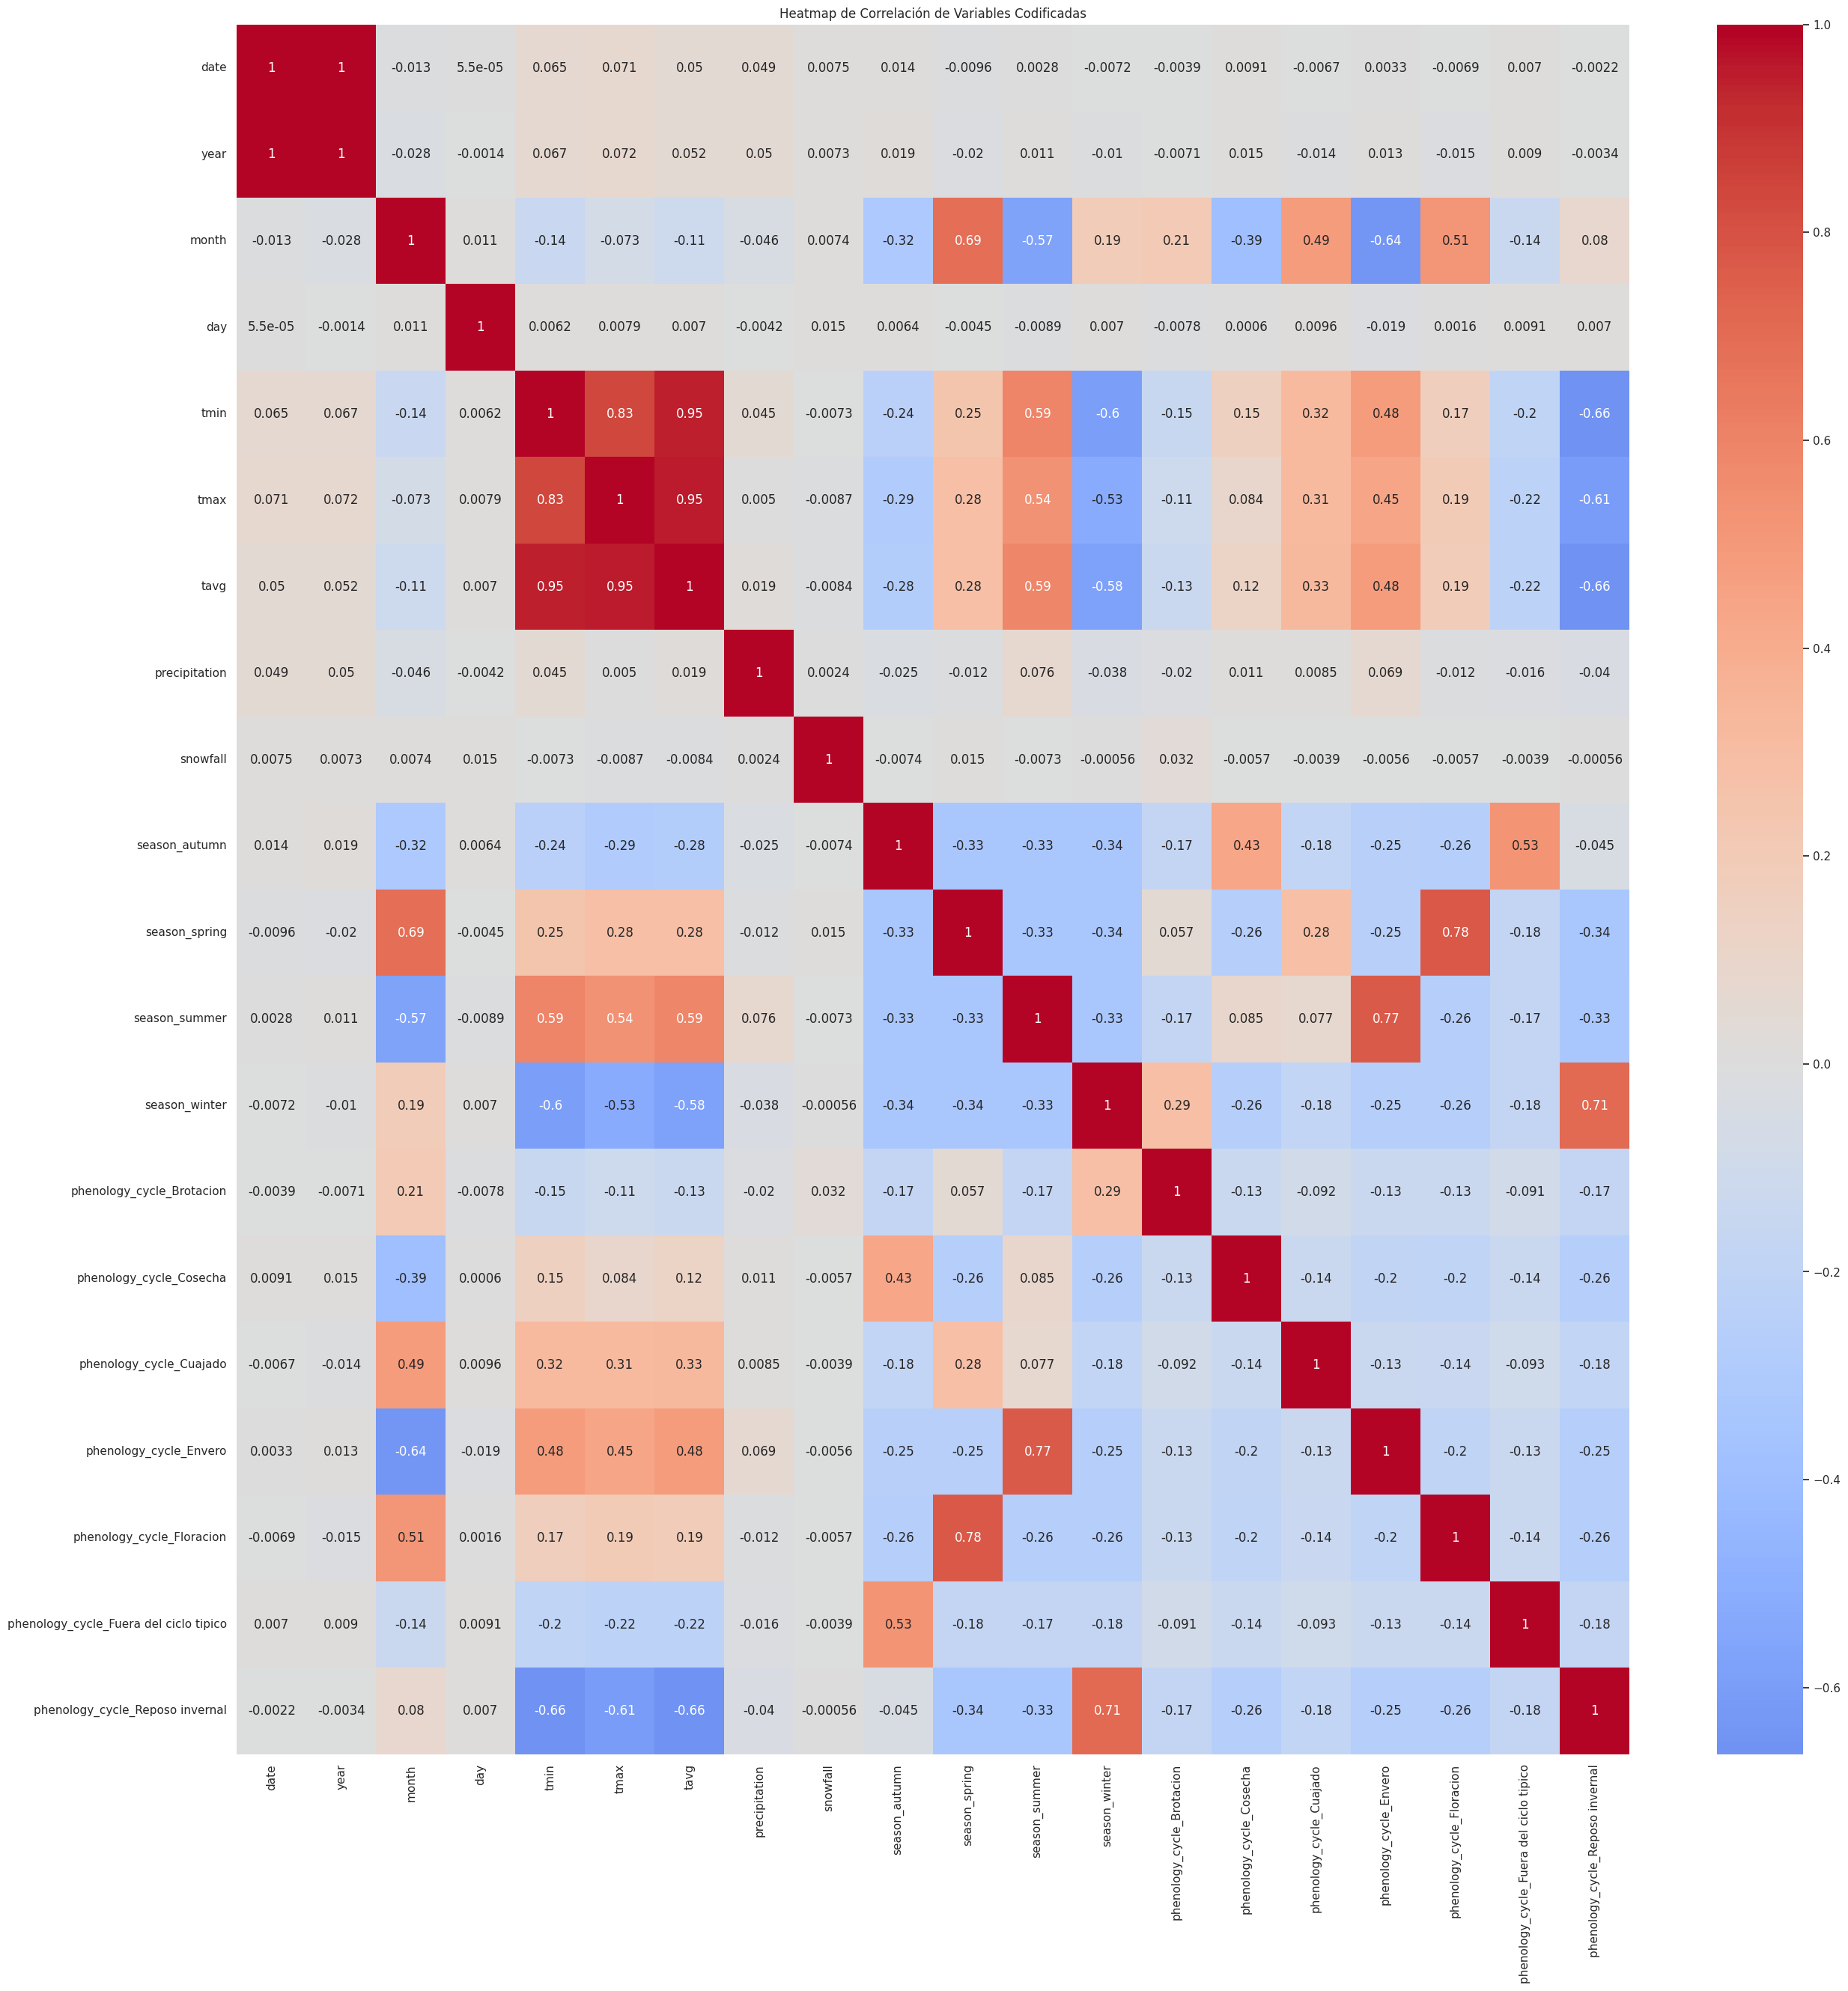

In [ ]:
df_encoded = pd.get_dummies(clima_full)

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Crear el heatmap de correlación
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlación de Variables Codificadas')
plt.show()

## ANALISIS INDIVIDUAL DE VARIABLES

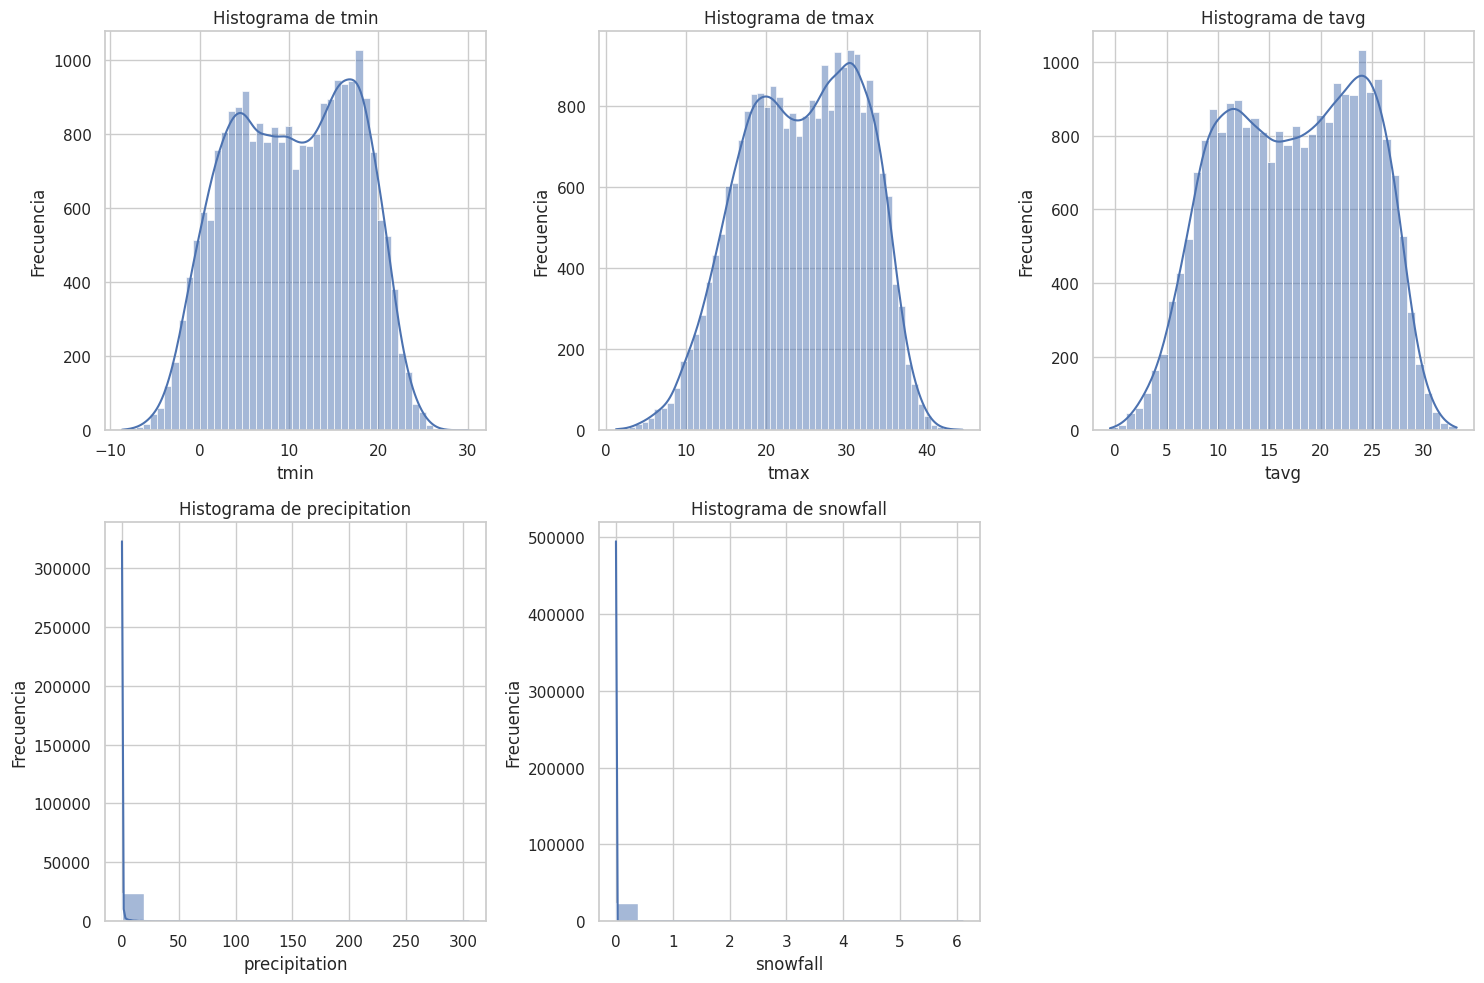

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con subgráficas
num_vars = clima_full.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_vars)
fig, axes = plt.subplots(nrows=(num_plots + 2) // 3, ncols=3, figsize=(15, (num_plots + 2) // 3 * 5))

# Aplanar la matriz de ejes para el acceso más fácil
axes = axes.flatten()

# Crear un histograma para cada variable numérica
for i, var in enumerate(num_vars):
    sns.histplot(clima_full[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes vacíos si hay menos gráficos que subgráficas
for j in range(len(num_vars), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()


<ipython-input-168-348b330bee88>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clima_full,x="precipitation", palette="coolwarm")


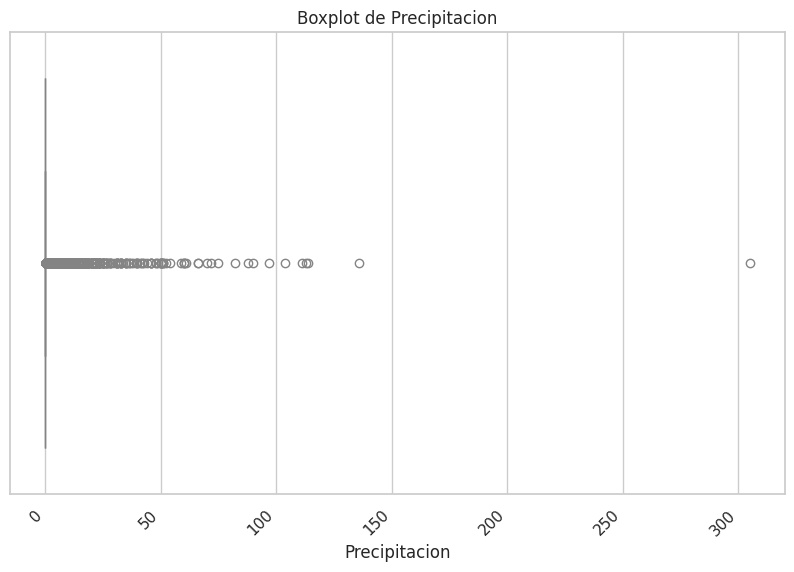

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clima_full,x="precipitation", palette="coolwarm")
plt.title('Boxplot de Precipitacion')
plt.xlabel('Precipitacion')
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-109-1ec452196aa6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clima_full,x="snowfall", palette="coolwarm")


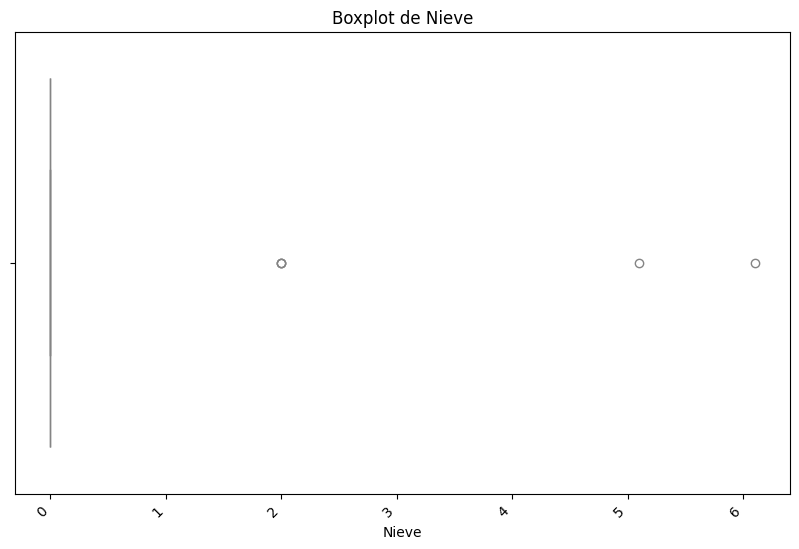

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clima_full,x="snowfall", palette="coolwarm")
plt.title('Boxplot de Nieve')
plt.xlabel('Nieve')
plt.xticks(rotation=45, ha='right')
plt.show()

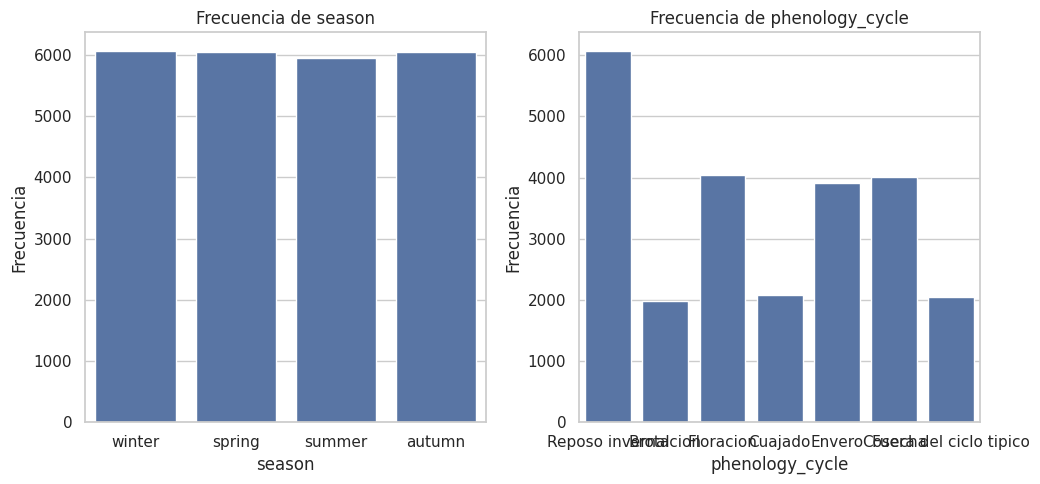

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar columnas categóricas
categorical_vars = clima_full.select_dtypes(include=['object']).columns

# Crear una figura con subgráficas
num_cats = len(categorical_vars)
fig, axes = plt.subplots(nrows=(num_cats + 2) // 3, ncols=3, figsize=(15, (num_cats + 2) // 3 * 5))

# Aplanar la matriz de ejes para el acceso más fácil
axes = axes.flatten()

# Crear un gráfico de barras para cada variable categórica
for i, var in enumerate(categorical_vars):
    sns.countplot(data=clima_full, x=var, ax=axes[i])
    axes[i].set_title(f'Frecuencia de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

# Eliminar ejes vacíos si hay menos gráficos que subgráficas
for j in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño
plt.tight_layout()
plt.show()


## COMPARACION DE TEMPERATURAS MAXIMA Y MINIMA

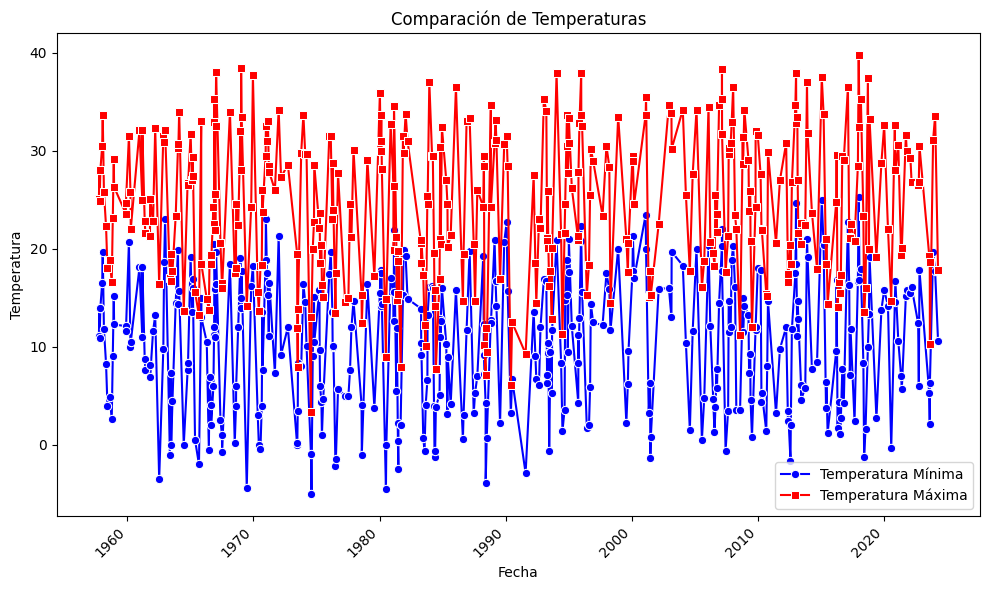

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10, 6))

# Graficar las tres series en el mismo gráfico
sns.lineplot(data=muestra_clima, x='date', y='tmin', label='Temperatura Mínima', color='blue', marker='o')
sns.lineplot(data=muestra_clima, x='date', y='tmax', label='Temperatura Máxima', color='red', marker='s')

# Configurar el título y las etiquetas
plt.title('Comparación de Temperaturas')
plt.xlabel('Fecha')
plt.ylabel('Temperatura')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

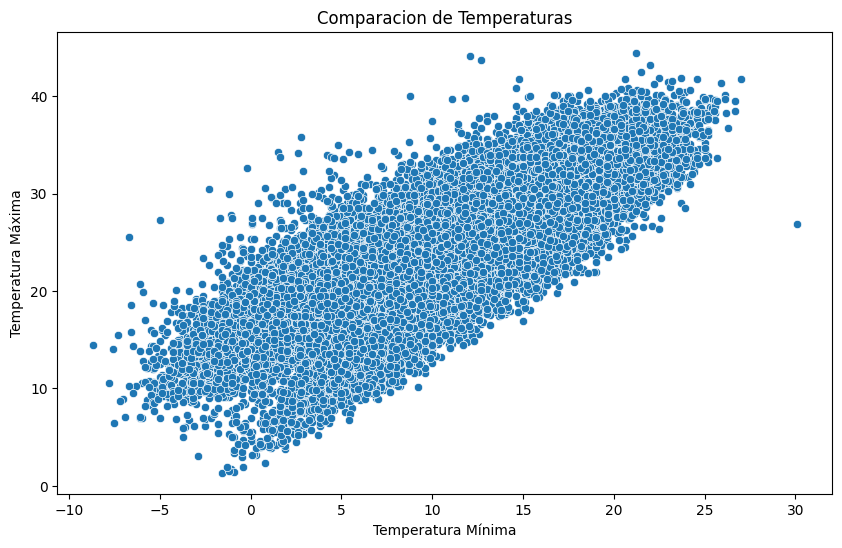

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Graficar las tres series en el mismo gráfico
sns.scatterplot(data=clima_full, x='tmin', y='tmax')
plt.title('Comparacion de Temperaturas')
plt.xlabel('Temperatura Mínima')
plt.ylabel('Temperatura Máxima')
plt.show()

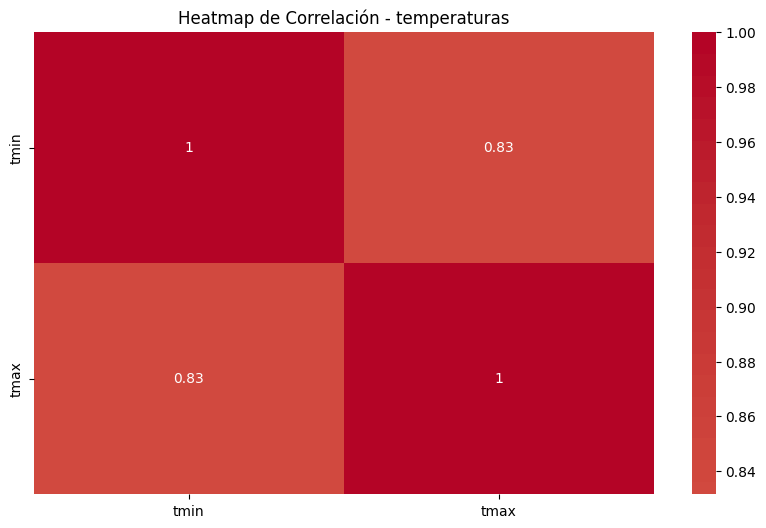

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(clima_full[['tmin','tmax']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap de Correlación - temperaturas')
plt.show()

<ipython-input-93-2a5f42b79d12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clima_full,x="phenology_cycle",y="tavg", palette="coolwarm")


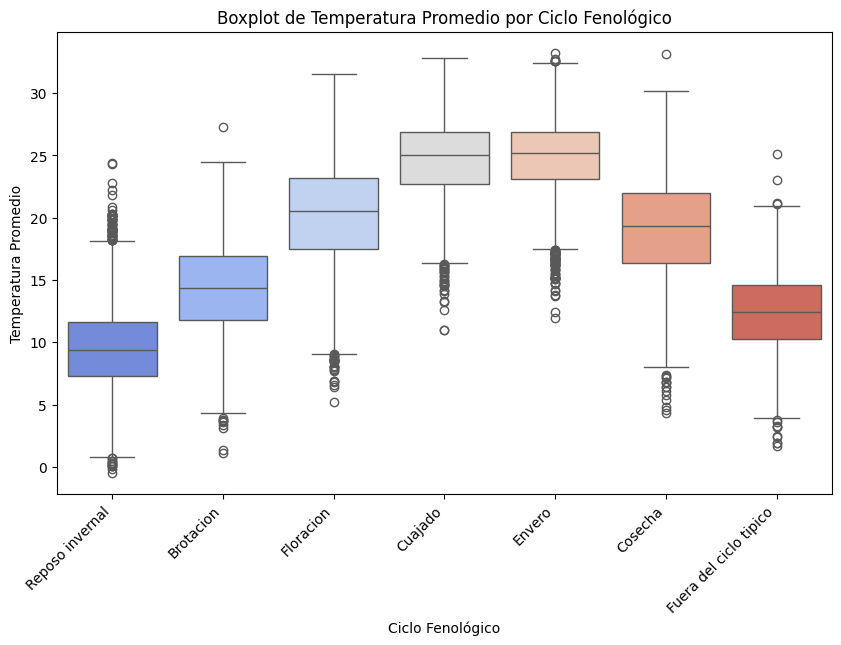

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clima_full,x="phenology_cycle",y="tavg", palette="coolwarm")
plt.title('Boxplot de Temperatura Promedio por Ciclo Fenológico')
plt.xlabel('Ciclo Fenológico')
plt.ylabel('Temperatura Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

## ESTACION - CICLO FENOLOGICO

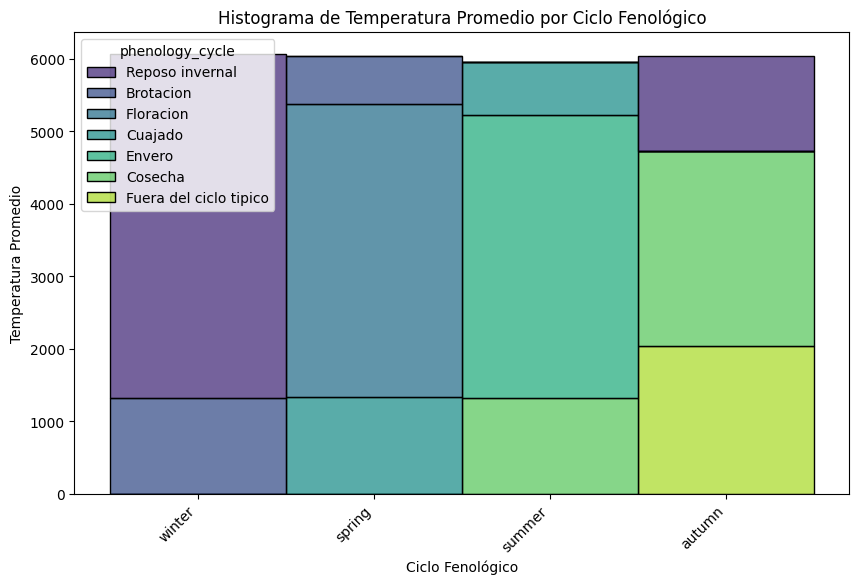

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=clima_full,x="season", hue="phenology_cycle", multiple='stack', palette='viridis')
plt.title('Histograma de Temperatura Promedio por Ciclo Fenológico')
plt.xlabel('Ciclo Fenológico')
plt.ylabel('Temperatura Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

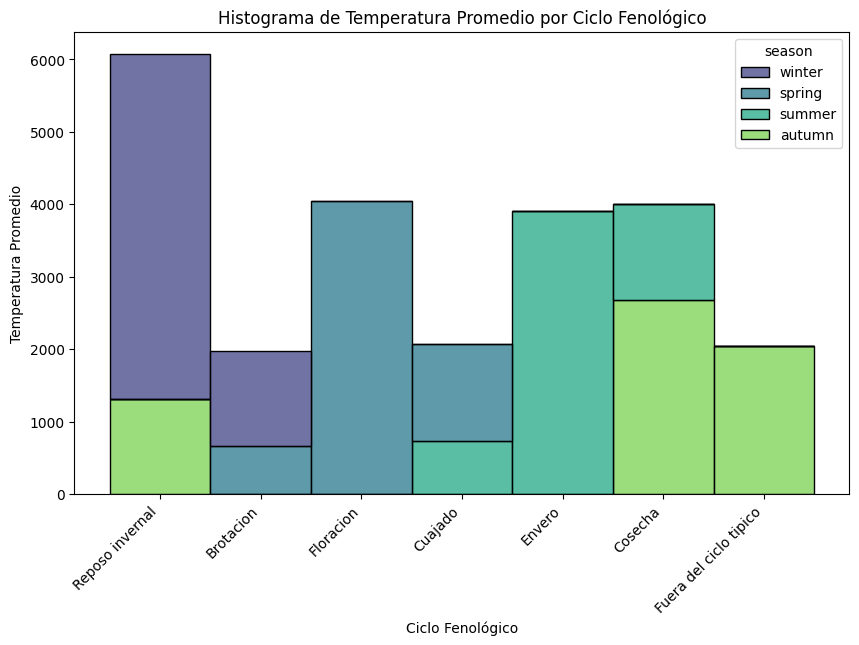

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=clima_full,x="phenology_cycle", hue="season", multiple='stack', palette='viridis')
plt.title('Histograma de Temperatura Promedio por Ciclo Fenológico')
plt.xlabel('Ciclo Fenológico')
plt.ylabel('Temperatura Promedio')
plt.xticks(rotation=45, ha='right')
plt.show()

## TEMPERATURA PROMEDIO POR ESTACION

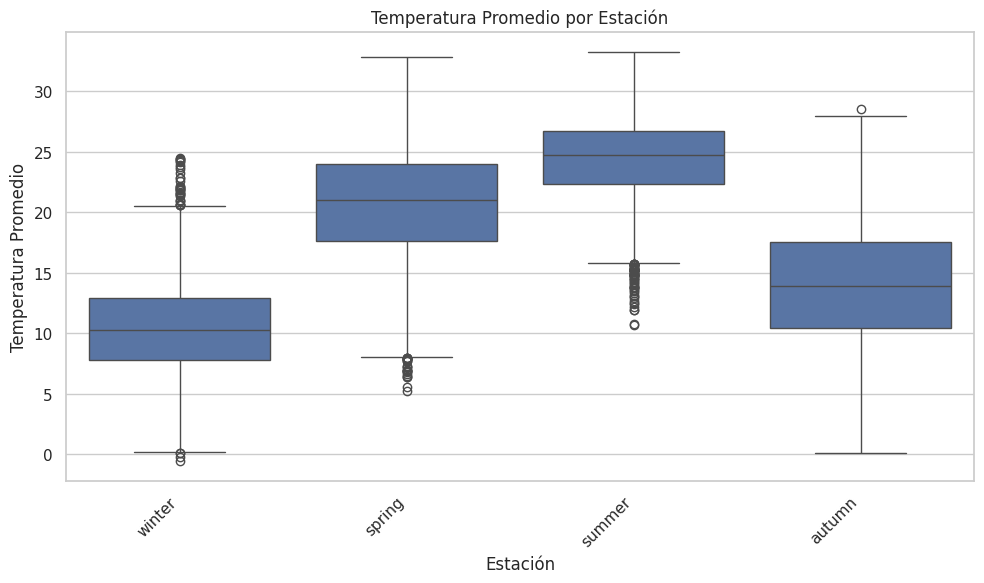

In [ ]:
sns.set(style="whitegrid")

# Crear la figura y el diagrama de cajas
plt.figure(figsize=(10, 6))
sns.boxplot(data=clima_full, x='season', y='tavg')
plt.title('Temperatura Promedio por Estación')
plt.xlabel('Estación')
plt.ylabel('Temperatura Promedio')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## CICLO FENOLOGICO - NIEVE (SNOWFALL)

<ipython-input-167-a94422013a62>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clima_full,x="phenology_cycle",y="snowfall", palette="coolwarm")


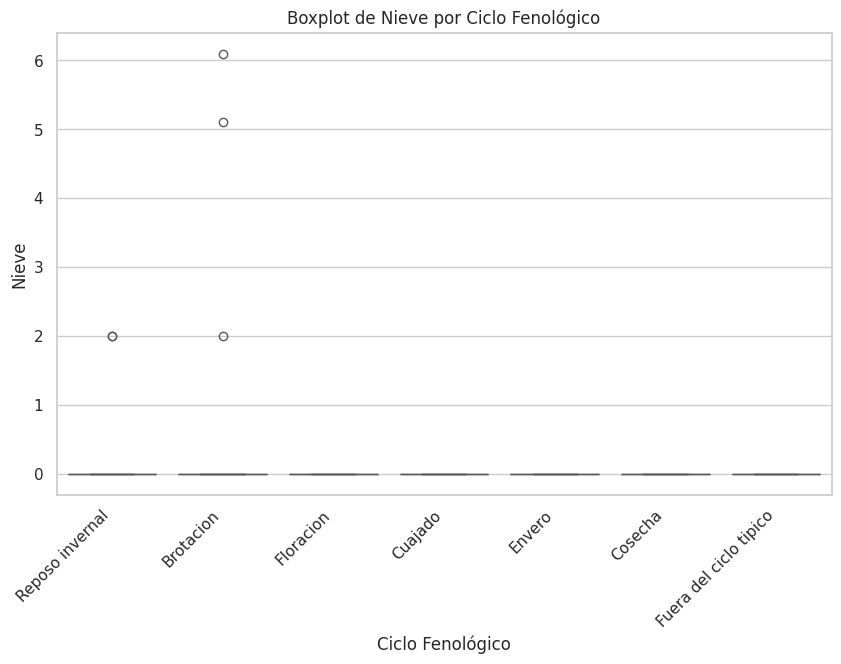

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clima_full,x="phenology_cycle",y="snowfall", palette="coolwarm")
plt.title('Boxplot de Nieve por Ciclo Fenológico')
plt.xlabel('Ciclo Fenológico')
plt.ylabel('Nieve')
plt.xticks(rotation=45, ha='right')
plt.show()

# ANALISIS DE VARIABLES PRECIPITACION - SNOWFALL